In [2]:
import numpy as np
import root_numpy as rnp
import ROOT

Welcome to JupyROOT 6.22/06


In [3]:
infile = '/Users/yw18581/Downloads/largedrum_1L_dense_MedianCut_3cmVoxel_withoutCut.discriminator.root'

In [4]:
f = ROOT.TFile(infile, 'r')
obj = f.Get('histMedianMetric')
h = rnp.hist2array(obj, include_overflow=True, return_edges=True)

In [5]:
import matplotlib.pyplot as plt

In [6]:
c = ROOT.TCanvas()

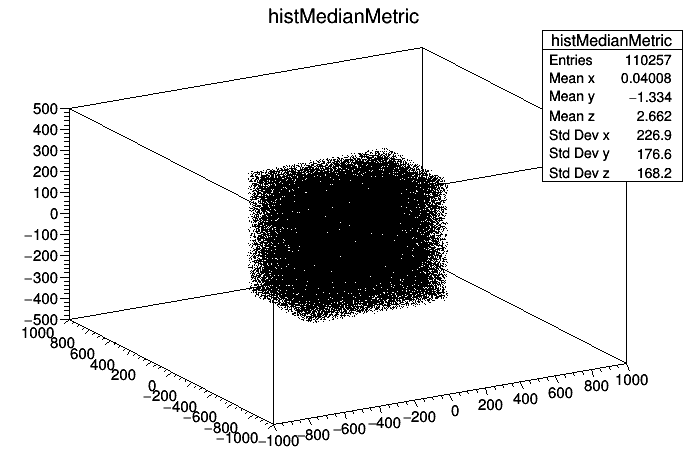

In [7]:
c.Draw()
obj.Draw()

In [8]:
import uproot3

In [9]:
fu = uproot3.open(infile)

In [11]:
hu = fu['histMedianMetric'].numpy()

In [12]:
hu[0].shape

(66, 66, 33)

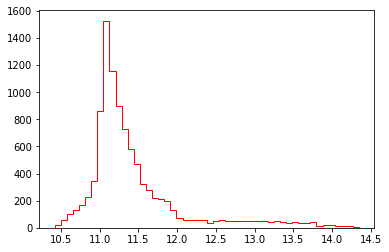

In [14]:
plt.hist(hu[0][hu[0]>0], bins=50, edgecolor='red', histtype=u'step')
plt.show()

In [15]:
histogram = hu[0]

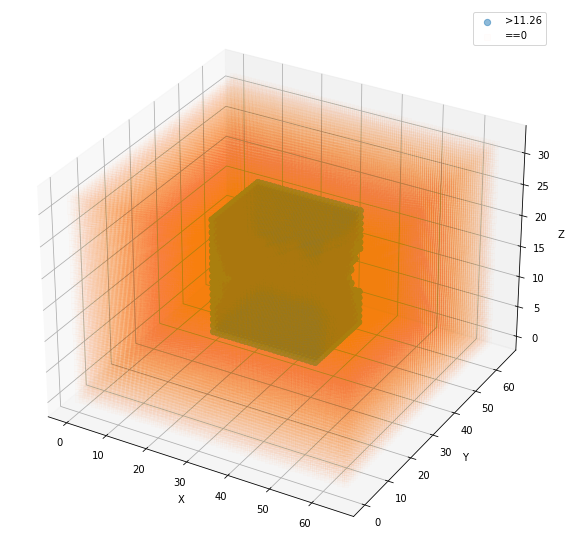

In [16]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection="3d")

ax.scatter(np.where(hu[0]>11)[0], np.where(hu[0]>11)[1], np.where(hu[0]>11)[2],
               label='>11.26', s=40, alpha=.5)
ax.scatter(np.where(hu[0]==0)[0], np.where(hu[0]==0)[1], np.where(hu[0]==0)[2],
               label='==0', s=40, alpha=.01, marker='s')
histogram[np.logical_and(histogram>0,histogram<11.26)]
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend(loc='upper right')
plt.show()

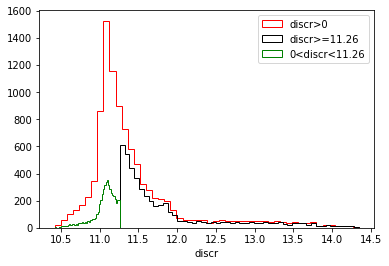

In [428]:
plt.hist(histogram[histogram>0], bins=50, edgecolor='red', histtype=u'step', label='discr>0')
plt.hist(histogram[histogram>=11.26], bins=50, edgecolor='black', histtype=u'step', label='discr>=11.26')
plt.hist(histogram[np.logical_and(histogram>0,histogram<11.26)], bins=50, edgecolor='green', histtype=u'step', 
        label='0<discr<11.26')
plt.legend(loc='upper right')
plt.xlabel('discr')
plt.show()

In [18]:
np.where(histogram>11.26)

(array([20, 20, 20, ..., 45, 45, 45]),
 array([23, 23, 23, ..., 42, 42, 42]),
 array([ 7,  8,  9, ..., 23, 24, 25]))

In [27]:
cut_data = histogram[histogram>11.26]

In [61]:
filtered_hist = np.copy(histogram)

In [62]:
filtered_hist[filtered_hist<=11.26]=0

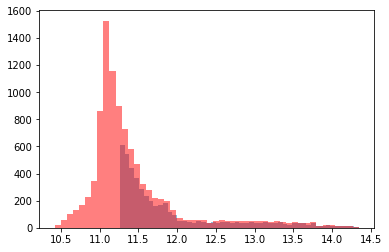

In [63]:
plt.hist(filtered_hist[filtered_hist>0].ravel(), bins=50, alpha=.5)
plt.hist(histogram[histogram>0].ravel(), bins=50, color='red',alpha=.5)
plt.show()

In [76]:
filtered_hist[20][23]

array([ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      , 12.395173, 13.131648, 13.128601, 12.778401, 12.475643,
       12.373504, 11.962128, 11.986031, 11.612514, 11.547502, 11.784332,
       12.470037, 13.023547, 13.480085, 13.276623, 13.988644, 13.566266,
       13.305578, 13.889805,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ], dtype=float32)

In [194]:
def cubes(x,y,z):
    for i in x:
        for j in y:
            for k in z:
                xx, yy, zz = np.mgrid[x[i-1:i+2], y[j-1:j+2], z[k-1:k+2]
                yield xx, yy, zz

In [195]:
test_cubes = cubes(np.arange(1,10), np.arange(1,10), np.arange(1,10))

In [196]:
next(test_cubes)

AttributeError: 'numpy.ndarray' object has no attribute 'step'

In [356]:
X, Y, Z = np.mgrid[-1:2:1, -1:2:1, -1:2:1]

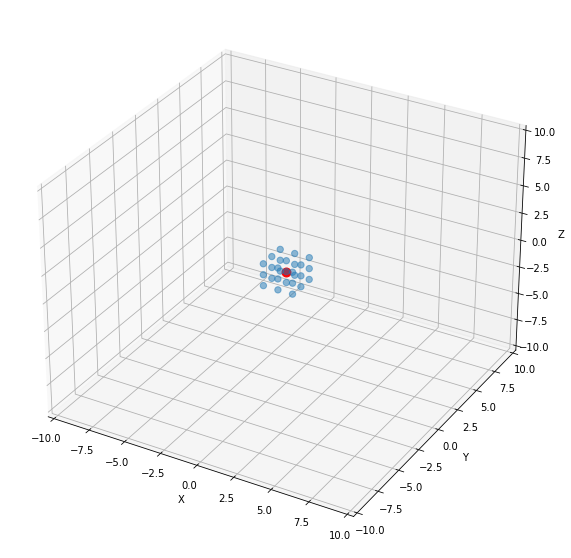

In [358]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection="3d")
ax.scatter(X,Y,Z, s=40, alpha=.5)
ax.scatter(0,0,0, s=80, c='red')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(-10,10)
#plt.legend(loc='upper right')
plt.show()

In [305]:
filtered_hist[20,23,7]

12.395173

In [359]:
def cubes(x, y, z):
    for i in x:
        for j in y:
            for k in z:
                xx, yy, zz = np.mgrid[i-1:i+2:1, j-1:j+2:1, k-1:k+2:1]
                yield (i, j, k), (xx, yy, zz)

In [360]:
c = cubes(np.arange(1,65), np.arange(1,65), np.arange(1,32))

In [361]:
indices, cubes_coords = next(c)

In [362]:
indices

(1, 1, 1)

In [365]:
filtered_hist[indices]

0.0

In [363]:
c1 = filtered_hist[cubes_coords]

In [364]:
c1

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [366]:
cube_gen = cubes(np.arange(1,65), np.arange(1,65), np.arange(1,32))
count = []
for i, (indices, cubes_coords) in enumerate(cube_gen):
    t = filtered_hist[indices]
    if t > 11.26:
        count.append((i,indices))
        #plt.figure(figsize=(6,6))
        #plt.title('i = {}, t = {}'.format(i,t))
        #plt.hist(filtered_hist[cubes_coords])
        

In [367]:
len(count)

4628

In [406]:
def cube(x, y, z):
    return np.mgrid[x-1:x+2:1, y-1:y+2:1, z-1:z+2:1]

In [420]:
stats = dict()
xx, yy, zz = np.where(filtered_hist>11.26)
for x, y, z in zip(xx, yy, zz):
    cx, cy, cz = cube(x, y, z)
    filtered_cube = filtered_hist[cx, cy, cz]
    over_threshold_count = len(filtered_cube[filtered_cube > 11.26])
    stats[(x, y, z)] = over_threshold_count

In [421]:
min(stats.values()), max(stats.values())

(1, 27)

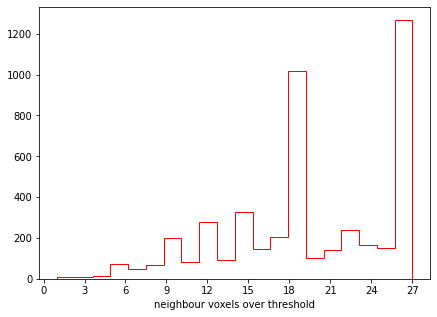

In [431]:
plt.figure(figsize=(7,5))
#plt.title('voxels over threshold')
plt.hist(stats.values() ,bins=20, edgecolor='red', histtype=u'step')
plt.xlabel('neighbour voxels over threshold')
plt.xticks(np.arange(0,30, 3))
plt.show()

In [449]:
interesting = list(filter(lambda e: stats[e] > 15, stats))

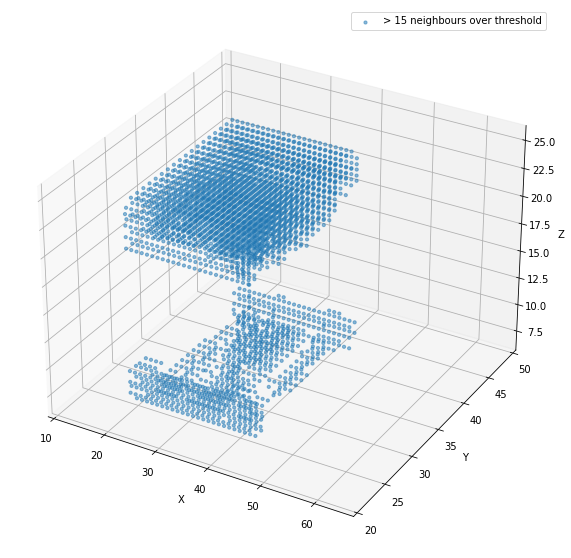

In [464]:
fig = plt.figure(figsize=(10,10))
ax.set_title('voxels with > 15 neighbours over threshold')
ax = fig.add_subplot(111,projection="3d")

ax.scatter(np.array(interesting)[:,0],np.array(interesting)[:,1],np.array(interesting)[:,2], 
           s=10, alpha=.5, label='> 15 neighbours over threshold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(10,66)
ax.set_ylim(20,50)
#ax.set_zlim(0,33)
plt.legend(loc='upper right')
plt.show()

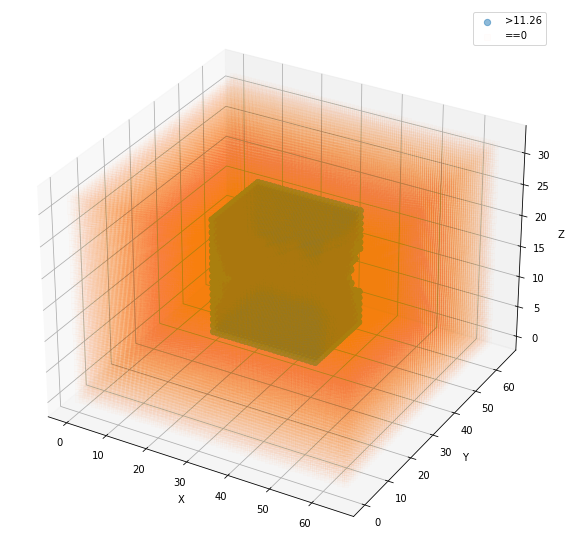

In [465]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection="3d")

ax.scatter(np.where(histogram>11)[0], np.where(histogram>11)[1], np.where(histogram>11)[2],
               label='>11.26', s=40, alpha=.5)
ax.scatter(np.where(histogram==0)[0], np.where(histogram==0)[1], np.where(histogram==0)[2],
               label='==0', s=40, alpha=.01, marker='s')
histogram[np.logical_and(histogram>0,histogram<11.26)]
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend(loc='upper right')
plt.show()

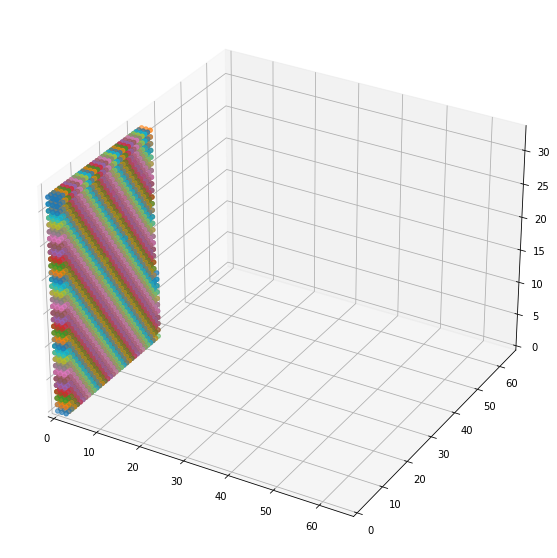

In [355]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection="3d")
cube_gen = cubes(np.arange(1,65), np.arange(1,65), np.arange(1,32))
for i, coord in enumerate(cube_gen):

    ax.scatter(coord[0],
              coord[1],
              coord[2])
    if i==1000:
        break
ax.set_xlim(0,66)
ax.set_ylim(0,66)
ax.set_zlim(0,33)
plt.show()

    

In [10]:
histogram = fu['histMedianMetric'].numpy()

In [14]:
histogram[0].shape

(66, 66, 33)

In [23]:
bins_x, bins_y, bins_z = histogram[1][0]

In [32]:
bins_x

array([-1000.        ,  -969.6969697 ,  -939.39393939,  -909.09090909,
        -878.78787879,  -848.48484848,  -818.18181818,  -787.87878788,
        -757.57575758,  -727.27272727,  -696.96969697,  -666.66666667,
        -636.36363636,  -606.06060606,  -575.75757576,  -545.45454545,
        -515.15151515,  -484.84848485,  -454.54545455,  -424.24242424,
        -393.93939394,  -363.63636364,  -333.33333333,  -303.03030303,
        -272.72727273,  -242.42424242,  -212.12121212,  -181.81818182,
        -151.51515152,  -121.21212121,   -90.90909091,   -60.60606061,
         -30.3030303 ,     0.        ,    30.3030303 ,    60.60606061,
          90.90909091,   121.21212121,   151.51515152,   181.81818182,
         212.12121212,   242.42424242,   272.72727273,   303.03030303,
         333.33333333,   363.63636364,   393.93939394,   424.24242424,
         454.54545455,   484.84848485,   515.15151515,   545.45454545,
         575.75757576,   606.06060606,   636.36363636,   666.66666667,
      

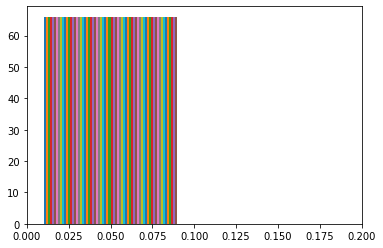

In [46]:
plt.hist(histogram[0][...,0])
plt.xlim(0,0.2)
plt.show()

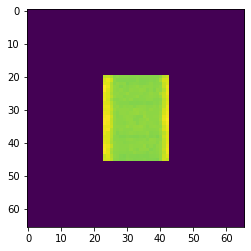

In [64]:
plt.imshow(histogram[0][:,:,7])

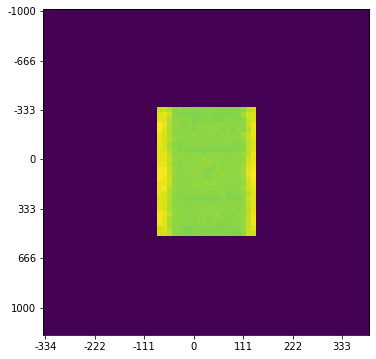

In [113]:
plt.figure(figsize=(6,6))
plt.imshow(histogram[0][:,:, 7])
plt.xticks([0,10,20,30,40,50,60], np.array([-1000, -666, -333, 0, 333, 666, 1000])//3)
plt.yticks([0,10,20,30,40,50,60], [-1000, -666, -333, 0, 333, 666, 1000])
plt.show()

In [110]:
bins_x[::11]

array([-1000.        ,  -666.66666667,  -333.33333333,     0.        ,
         333.33333333,   666.66666667,  1000.        ])